In [1]:
from net.parse import *
from net import *

In [2]:
DELTA = 3
K = float('inf')
CONTEXT = 10

In [3]:
# Build dataset
trends = merge_on_date(parse_path(Path('../data/trends'))) # Parse trends data
stats = get_data() # Parse stats data
x_train, y_train, x_test, y_test, x_dev, y_dev = build_data(trends, stats, DELTA, K, CONTEXT)

/Users/tudor/CS-Work/ML/P3/VFNN/src/net/parse/finance_parser.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  daily = yf.download(tickers='^SPX', start=start, end=end, interval='1d')
[*********************100%***********************]  1 of 1 completed


In [4]:
# Model Hyperparameters
HIDDEN = 64
INPUT_SIZE = 28 # Fixed
MLP_SIZE = (64, 128, 1) # Has to end in 1
BATCH_SIZE = 32
STEPS = 5000
LR = 0.1

In [5]:
# Initialize
model = VFNN(HIDDEN, INPUT_SIZE, MLP_SIZE)

Loss: 0.4999473989009857 on step: 1
Loss: 0.5968724489212036 on step: 101
Loss: 0.47615525126457214 on step: 201
Loss: 0.4135783016681671 on step: 301
Loss: 0.42056509852409363 on step: 401
Loss: 0.3831201195716858 on step: 501
Loss: 0.31854310631752014 on step: 601
Loss: 0.8760361671447754 on step: 701
Loss: 0.5627622008323669 on step: 801
Loss: 0.33815866708755493 on step: 901
Loss: 0.5389630198478699 on step: 1001
Loss: 0.5789872407913208 on step: 1101
Loss: 0.772666871547699 on step: 1201
Loss: 0.2953163683414459 on step: 1301
Loss: 0.25628310441970825 on step: 1401
Loss: 0.3826412856578827 on step: 1501
Loss: 0.22397343814373016 on step: 1601
Loss: 0.2320316731929779 on step: 1701
Loss: 0.5948053002357483 on step: 1801
Loss: 0.4055964946746826 on step: 1901
Loss: 0.38672733306884766 on step: 2001
Loss: 0.6433813571929932 on step: 2101
Loss: 0.42183277010917664 on step: 2201
Loss: 0.2645449936389923 on step: 2301
Loss: 0.5586094856262207 on step: 2401
Loss: 0.18184825778007507 on s

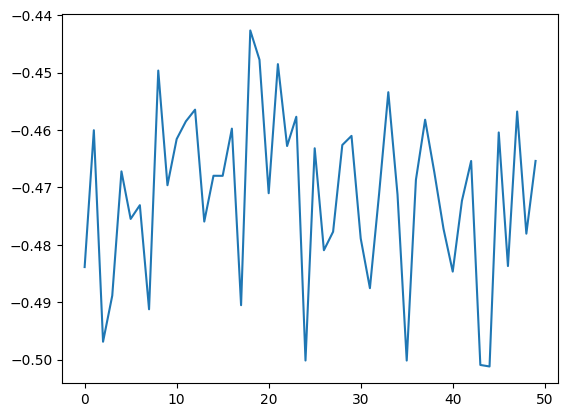

In [6]:
# Train
model.train()
lossi = sgd(model, MAE, x_train, y_train, LR, BATCH_SIZE, STEPS)

# Plot loss
from matplotlib import pyplot as plt
plt.plot(torch.tensor(lossi).view(-1, 100).mean(1))

In [7]:
model.eval()
vals = model.forward(x_dev)
loss = MAE(vals, y_dev)
print(loss.item())

0.2551664412021637


In [8]:
print(vals[:10])
print(y_dev[:10])

tensor([[-0.2169],
        [-0.2032],
        [-0.2162],
        [-0.2028],
        [-0.2128],
        [-0.2109],
        [-0.2106],
        [-0.2166],
        [-0.2209],
        [-0.2089]], grad_fn=<SliceBackward0>)
tensor([-0.2095, -0.2048, -0.2573,  0.0155, -0.1932, -0.2453, -0.2313, -0.1912,
        -0.2691, -0.3106])
